# Learning Curves para Machine Learning

# 01 - O trade-off viés-variância

Antes de cair de cabeça nós estudos sobre **Learning Curves (ou Curvas de Aprendizado)** nós precisamos esclarecer algumas coisas primeiro. Principalmente, **O trade-off viés-variância**.

Inicialmente, o que vocês tem que ter em mente é que:

> A medida que aumenta a *complexidade* de um modelo o **vies/bias** e **variância** vão se distanciando inversamente.

Para ficar mais claro vamos analisar a imagem (gráfico) abaixo:

![img](images/overfitting-underfitting-03.png)  

 - **Quanto MAIOR A COMPLEXIDADE do modelo (eixo-x), ou seja, mais parâmetros (features) são adicionados:**
   - Maior é o Erro da Variância;
   - Menor é o Erro do Viés/Bias.
 - **Quanto MENOR A COMPLEXIDADE do modelo (eixo-x), ou seja, menos parâmetros (features) são adicionados:**
   - Menor é o Erro de Variância;
   - Maior é o Erro de Viés/Bias.
 - **O erro total (Total Error) independente da Complexidade do modelo vai iniciar e terminar lá em cima, porém, ele não é constante**:
   - Vejam que ele começa lá em cima > vai caindo > sobe novamente - Por isso, não é constante
 - **O melhor a se fazer é encontrarmos o equilíbrio entre os dois erros e o erro total:**
   - A linha tracejada demonstra o equilíbrio (Optimum Model Complexity) entre os dois erros e o erro total e é lá onde queremos chegar.

**NOTE:**  
Olhando para a imagem e as observações acima fica claro que existe um **trade-off** entre o **viés/bias** e a **variância** e nós queremos chegar no valor mínimo possível dos dois erros simultaneamente.

---

# 02 - Introdução a Learning Curves (ou Curvas de Aprendizado)

Para entender como funcionam as **Learning Curves (ou Curvas de Aprendizado)** vamos seguir com a seguinte analogia:

 - **Digamos que temos alguns dados e os dividimos em um conjunto de treinamento e um conjunto de validação:**
   - Pegamos uma única instância (isso mesmo, uma!) do conjunto de treinamento e a usamos para estimar um modelo;
   - Em seguida, medimos o erro do modelo no conjunto de validação em relação essa única instância de treinamento.

Algo parecido com isso:

![img](images/lc-01.png)  

 - **Erro no conjunto de treinamento:**
   - O erro na instância de treinamento será 0 (zero), pois é muito fácil ajustar perfeitamente um único ponto de dados.
 - **Erro no conjunto de validação:**
   - Porém, o erro no conjunto de validação, no entanto, foi muito grande;
   - Isso ocorre porque o modelo é construído (treinado) em torno de uma única instância e quase certamente não será capaz de generalizar com precisão em dados que não foram vistos antes.

Agora digamos que em vez de uma instância de treinamento, pegamos 10 (dez) e repetimos as medidas de erro, algo parecido com isso:

![img](images/lc-02.png)  

 - **Erro no conjunto de treinamento:**
   - Agora temos uma situação onde os dados não se ajustam perfeitamente como antes.
 - **Erro no conjunto de validação:**
   - Porém, o erro nos dados de validação ainda é muito grande, ou seja, o conjunto de treinamento não aprendeu o suficiente para generalizar em dados que nunca viu antes.

Ok, agora vamos aumentar o número de instâncias de treinamento para 80, algo parecido com isso:

![img](images/lc-03.png)  

 - **Erro no conjunto de treinamento:**
   - Vejam que quanto mais dados nós passamos para o modelo aprender mais aumenta o erro do conjunto de treinamento.
 - **Erro no conjunto de validação:**
   - Porém, o erro nos dados de validação diminuem.

**Então, e se pegamos cem, quinhentos, mil, até usarmos todo o nosso conjunto de treinamento?**  
As pontuações de erro variam mais ou menos à medida que alteramos o conjunto de treinamento. Assim, temos duas pontuações de erro para monitorar:

 - Uma para o conjunto de treinamento;
 - E outra para os conjuntos de validação.

**NOTE:**  
Se traçarmos a evolução das duas pontuações de erro à medida que os conjuntos de treinamento mudam, acabamos com duas curvas. Estas curvas são chamadas de **Learning Curves (ou Curvas de Aprendizado)**.

> Em poucas palavras, uma **Learning Curves (ou Curvas de Aprendizado)** mostra como o erro muda à medida que o tamanho do conjunto de treinamento aumenta.

Se tivéssemos plotado **Learning Curves (ou Curvas de Aprendizado)** para os conjuntos de treinamento e validação dos exemplos acima nós teríamos seguintes gráficos:

![img](images/learning_curves.webp)  

 - **Erro no conjunto de treinamento:**
   - A medida que aumenta as instâncias do conjunto de treinamento, aumenta o erro do mesmo.
 - **Erro no conjunto de validação:**
   - Porém, a medida que aumenta as instâncias do conjunto de treinamento diminui o erro do conjunto de validação.

**NOTE:**  
As **Learning Curves (ou Curvas de Aprendizado)** nos dão a oportunidade de diagnosticar **variância** e **viés/bias** em modelos de *aprendizado supervisionado*.

---

# 03 - Learning Curves na Prática com Scikit-Learn

## 03.1 - Escolhendo  e entendendo o Problema

As **Learning Curves (ou Curvas de Aprendizado)** traçadas acima são idealizadas para fins de ensino. Na prática, no entanto, elas geralmente parecem significativamente diferentes. Então, vamos levar a discussão para um cenário prático usando alguns dados do mundo real.

Para entender na prática como funcionam às **Learning Curves (ou Curvas de Aprendizado)** tentaremos construir:

> **Modelo de regressão que prevejam a produção horária de energia elétrica de uma usina.**

**NOTE:**  
Vamos utilizar o conjunto de dados [Combined Cycle Power Plant Data Set](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant) vêm dos pesquisadores turcos **Pınar Tüfekci** e **Heysem Kaya**.

**Resumo do problema:**  
O conjunto de dados contém *9.568 pontos de dados (amostras)* coletados de uma Usina de Ciclo Combinado ao longo de 6 anos (2006-2011), quando a usina foi configurada para trabalhar com carga total.

**Informações do atributo:**  
 - Os recursos consistem em variáveis ​​ambientais médias por hora
   - Temperatura (T) na faixa de 1,81°C e 37,11°C,
   - Pressão ambiente (AP) na faixa de 992,89-1033,30 milibar,
   - Umidade Relativa (RH) na faixa de 25,56% a 100,16 %
   - Vácuo de Exaustão (V) na faixa 25,36-81,56 cm Hg
   - Produção de energia elétrica horária líquida (EP) 420,26-495,76 MW

Agora que já entendemos o básico sobre o problema, vamos pegar o conjunto de dados com a função **read_excel()** da biblioteca Pandas:

In [1]:
import pandas as pd
electricity = pd.read_excel('data/Folds5x2_pp.xlsx')
electricity.info()
electricity.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


**Observações do problema:**  
 - A coluna (feature) **PE** acima é a variável de destino (target) e descreve a saída horária líquida de energia elétrica.
 - Todas as outras variáveis são características potenciais, e os valores para cada uma são, na verdade, médias horárias (não valores líquidos, como para **PE**).
 - A eletricidade é gerada por:
   - turbinas a gás;
   - turbinas a vapor;
   - E geradores de vapor de recuperação de calor.
 - De acordo com a documentação do conjunto de dados:
   - O nível de vácuo tem efeito nas turbinas a vapor;
   - Enquanto as outras três variáveis afetam as turbinas a gás.

Consequentemente, usaremos todas as colunas (features) de recursos em nossos modelos de regressão. Nesta etapa, normalmente deixamos de lado um conjunto de teste, exploramos os dados de treinamento minuciosamente, removemos quaisquer discrepâncias, medimos correlações etc.

**NOTE:**  
Para fins de ensino, no entanto, vamos supor que isso já foi feito e pular direto para gerar algumas curvas de aprendizado. Antes de começarmos, vale a pena notar que não há valores ausentes. Além disso, os números não são dimensionados, mas evitaremos o uso de modelos que tenham problemas com dados não dimensionados.

---

## 03.2 - Decidindo os tamanhos dos conjuntos de treinamento

Vamos primeiro decidir quais tamanhos dos conjuntos de treinamento queremos usar para gerar as curvas de aprendizado:

 - O valor mínimo é 1;
 - O máximo é dado pelo número de instâncias no conjunto de treinamento.
   - Nosso conjunto de treinamento possui 9.568 instâncias, portanto, o valor máximo é 9.568.
 - No entanto, ainda não deixamos de lado um conjunto de validação. Faremos isso usando uma proporção de **80:20**:
   - Terminando com um conjunto de treinamento de 7.654 instâncias (80%);
   - E um conjunto de validação de 1.914 instâncias (20%).
 - Dado que nosso conjunto de treinamento terá 7654 instâncias, o valor máximo que podemos usar para gerar nossas curvas de aprendizado é 7654.

Para o nosso exemplo usaremos os seguintes 6 tamanhos:

In [2]:
train_sizes = [1, 100, 500, 2000, 5000, 7654]

**Algumas observações aqui são:**  
 - Uma coisa importante a se ter em mente é que para cada tamanho especificado um novo modelo é treinado.
 - Para economizar tempo de execução do código, é uma boa prática limitar-se a **5** a **10 tamanhos de treinamento**.

---

## 03.2 - Utilizando a função learning_curve() da biblioteca scikit-learn

Ótimo, agora que já definimos os tamanhos para os conjuntos de treinamento vamos aprender sobre a função **learning_curve()** da biblioteca *scikit-learn*, responsável por gerar **Learning Curves (ou Curvas de Aprendizado)**.

**NOTE:**  
Um ponto importante aqui é que não há necessidade da nossa parte deixar de lado um *conjunto de validação*, porque a função **learning_curve()** cuidará disso.

Primeiro, vamos deixar o código abaixo que faz toda essa bruxaria e depois vamos para as explicações:

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

features = ['AT', 'V', 'AP', 'RH'] # Features.
target = 'PE' # Target variable.

train_sizes, train_scores, validation_scores = learning_curve(
  estimator = LinearRegression(),
  X = electricity[features],
  y = electricity[target],
  train_sizes = train_sizes,
  cv = 5,
  scoring = 'neg_mean_squared_error'
)

**O que aconteceu no código acima foi o seguinte:**

 - **Importamos as classes necessárias:**
   - LinearRegression()
   - learning_curve()
 - **Criamos variáveis que vão armazenar as variáveis independentes e dependente:**
   - Independentes = features = ['AT', 'V', 'AP', 'RH']
   - Dependente = target = 'PE'
 - **Criamos uma instância da classe *learning_curve* que:**
   - **Recebeu como argumento:**
     - Estimator = Objeto (modelo) que ele vai utilizar para fazer previsões:
       - Esse objeto tem que ser capaz de executar os métodos “fit” e “predict”.
     - Variáveis independentes (X);
     - Variável dependente (y ou target);
     - train_sizes = O tamanho dos conjuntos de treinamento;
     - cv = Cross-Validation
     - Scoring = Métrica de Avaliação
   - **Retornou:**
     - train_sizes:
       - Números de exemplos de treinamento que foram usados para gerar a *curva de aprendizado*.
       - Observe que o número de ticks pode ser menor que n_ticks porque as entradas duplicadas serão removidas.
       - *Na verdade esse retorno vai ser a mesma lista que nós passamos como entrada: train_sizes = [1, 100, 500, 2000, 5000, 7654]*
     - train_scores:
      - Scores DOS conjuntoS de treinamento.
     - validation_scores:
       - Scores DO conjunto de teste (ou validação).

---

## 03.3 - Analisando as saídas da função learning_curve()

Como nós já sabemos o que está dentro da variável **train_sizes (1, 100, 500, 2000, 5000, 7654)** vamos apenas inspecionar as outras duas variáveis para ver o que **learning_curve()** nos retornou. Que na verdade, que são:
 - **train_scores::**
   - Os resultados para os erros de treinamento.
 - **validation_scores:**
   - Os resultados para os erros de validação.

Vamos começar com os erros de treinamento:

In [4]:
type(train_scores)

numpy.ndarray

Opa, vejam que nós temos Arrays Numpy como saída... vamos ver as dimenões?

In [5]:
train_scores.shape

(6, 5)

**O que significa essa matriz 6x5?**  
 - **Linhas (6):**
   - Representam os erros para os 6 conjuntos de treinamentos que nós separamos.
 - **Colunas (5):**
   - Como nós estamos utilizando Cross-Validation=5, significa que para cada conjunto de treinamento vamos ter 5 splits de 5 folds cada.

**NOTE:**  
Essa mesma abordagem de análise nós vamos fazer agora, porém, para os dados de validação:

In [6]:
type(train_scores)

numpy.ndarray

In [7]:
train_scores.shape

(6, 5)

**Por que nós temos as mesmas dimensões para os conjuntos de validação?**  
Para cada conjunto de treinamento (e suas divisões) nós temos seus respectivos erros de conjunto de validação. Por isso, as mesmas dimensões.

**NOTE:**  
Por fim, vamos exibir esses erros para os **conjuntos de treinamento** e **validação**:

In [8]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # Estamos multiplicando o caractere '-' por 70, ou seja, uma linha tracejada.
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[ -0.          -0.          -0.          -0.          -0.        ]
 [-19.71230701 -18.31492642 -18.31492642 -18.31492642 -18.31492642]
 [-18.14420459 -19.63885072 -19.63885072 -19.63885072 -19.63885072]
 [-21.53603444 -20.18568787 -19.98317419 -19.98317419 -19.98317419]
 [-20.47708899 -19.93364211 -20.56091569 -20.4150839  -20.4150839 ]
 [-20.98565335 -20.63006094 -21.04384703 -20.63526811 -20.52955609]]

 ----------------------------------------------------------------------

Validation scores:

 [[-619.30514723 -379.81090366 -374.4107861  -370.03037109 -373.30597982]
 [ -21.80224219  -23.01103419  -20.81350389  -22.88459236  -23.44955492]
 [ -19.96005238  -21.2771561   -19.75136596  -21.4325615   -21.89067652]
 [ -19.92863783  -21.35440062  -19.62974239  -21.38631648  -21.811031  ]
 [ -19.88806264  -21.3183303   -19.68228562  -21.35019525  -21.75949097]
 [ -19.9046791   -21.33448781  -19.67831137  -21.31935146  -21.73778949]]


**NOTE:**  
Como nós especificamos 6 tamanhos de conjuntos de treinamento (1, 100, 500, 2000, 5000, 7654), você talvez estaja esperando 6 valores para cada tipo de pontuação (score). Entretando, como já foi analisado acima, na hora da instanciação da classe **learning_curve()** nós passamos o parâmetro **cv=5**, ou seja, estamos utilizando uma validação-cruzada (K-Fold) igual a 5. Por isso, temos matrizes **6x5**, onde:

Vamos pegar apenas **train_scores** e abstrair para a seguinte tabela:

| Tamanho do conjunto de treinamento (índice) |	Divisão1	 |   Divisão2	|   Divisão3   | Divisão 4	  | Divisão 5    |
|---------------------------------------------|--------------|--------------|--------------|--------------|--------------|
| 1                                           |   	 0       |      0       |     	0	   |       0      |	      0      |
| 100	                                      | -19.71230701 | -18.31492642 | -18.31492642 | -18.31492642 |	-18.31492642 |
| 500	                                      | -18.14420459 | -19.63885072 | -19.63885072 | -19.63885072 |	-19.63885072 |
| 2000	                                      | -21.53603444 | -20.18568787 | -19.98317419 | -19.98317419 |	-19.98317419 |
| 5000	                                      | -20.47708899 | -19.93364211 | -20.56091569 | -20.4150839  |	-20.4150839  |
| 7654	                                      | -20.98565335 | -20.63006094 | -21.04384703 | -20.63526811 |	-20.52955609 |

**NOTE:**  
Uma observação aqui é que para plotar as **curvas de aprendizado**, precisamos apenas de uma única pontuação (score) de erro por tamanho de conjunto de treinamento e não 5. Por esse motivo, vamos pegar o valor médio de cada linha e também inverter os sinais das pontuações de erro, ou seja, vamos deixar os scores positivos (menos o primeiro que foi 0 erro).

In [9]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores:\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # Separator
print('\nMean validation scores:\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores:
 1       -0.000000
100     18.594403
500     19.339921
2000    20.334249
5000    20.360363
7654    20.764877
dtype: float64

 --------------------

Mean validation scores:
 1       423.372638
100      22.392186
500      20.862362
2000     20.822026
5000     20.799673
7654     20.794924
dtype: float64


**NOTE:**  
Ótimo, agora nós temos as médias dos erros para os 6 conjuntos de treinamento e os respectivos erros de validação. Finalmente,  temos todos os dados que precisamos para traçar as **Learning Curves (ou Curvas de Aprendizado)**. Porém, antes de fazer a plotagem, precisamos parar e fazer algumas observações importantes...

Primeiro, você deve ter notado que algumas pontuações (scores) de erro nos conjuntos de treinamento são as mesmas:


| Tamanho do conjunto de treinamento (índice) |	Divisão1	 |   Divisão2	|   Divisão3   | Divisão 4	  | Divisão 5    |
|---------------------------------------------|--------------|--------------|--------------|--------------|--------------|
| 1                                           |   	 **0**       |      **0**       |     	**0**	   |       **0**      |	      **0**      |
| 100	                                      | -19.71230701 | **-18.31492642** | **-18.31492642** | **-18.31492642** |	**-18.31492642** |
| 500	                                      | -18.14420459 | **-19.63885072** | **-19.63885072** | **-19.63885072** |	**-19.63885072** |
| 2000	                                      | -21.53603444 | -20.18568787 | **-19.98317419** | **-19.98317419** |	**-19.98317419** |
| 5000	                                      | -20.47708899 | -19.93364211 | -20.56091569 | **-20.4150839**  |	**-20.4150839**  |
| 7654	                                      | -20.98565335 | -20.63006094 | -21.04384703 | -20.63526811 |	-20.52955609 |

Vejam que elas ou são as mesmas ou se aproximam muito, para a linha correspondente ao tamanho do conjunto de treinamento de 1, isso é esperado, mas e as outras linhas?

Com exceção da última linha, temos muitos valores idênticos. Por exemplo, pegue a segunda linha onde temos valores idênticos da segunda divisão em diante. Por que, isso?

> **Isso é causado por não randomizar os dados de treinamento para cada divisão.**

Para entender melhor veja o diagrama (imagem) abaixo:

![img](images/splits.png)  

Quando o tamanho de treinamento é 500, **as primeiras 500 instâncias no conjunto de treinamento são selecionadas**, porém, como a primeira parte foi reservada para os dados de validação as 500 instâncias serão retiradas da segunda parte:

![img](images/splits-01.png)  

**NOTE:**  
Uma observação aqui é que a partir da segunda divisão (splits), essas 500 instâncias serão retiradas da primeira parte:

![img](images/splits-02.png)  

Como não randomizamos o conjunto de treinamento, as 500 instâncias usadas para treinamento são as mesmas para a segunda divisão (splits) em diante.

**NOTE:**  
Isso explica os valores idênticos da segunda divisão em diante para o caso de 500 instâncias de treinamento.

| Tamanho do conjunto de treinamento (índice) |	Divisão1	 |   Divisão2	|   Divisão3   | Divisão 4	  | Divisão 5    |
|---------------------------------------------|--------------|--------------|--------------|--------------|--------------|
| 500	                                      | -18.14420459 | **-19.63885072** | **-19.63885072** | **-19.63885072** |	**-19.63885072** |

**NOTE:**  
Um raciocínio idêntico se aplica ao caso de 100 instâncias, e um raciocínio semelhante se aplica aos outros casos.

![img](images/splits-02.png)  

| Tamanho do conjunto de treinamento (índice) |	Divisão1	 |   Divisão2	|   Divisão3   | Divisão 4	  | Divisão 5    |
|---------------------------------------------|--------------|--------------|--------------|--------------|--------------|
| 100	                                      | -19.71230701 | **-18.31492642** | **-18.31492642** | **-18.31492642** |	**-18.31492642** |

**NOTE:**  
Para interromper esse comportamento, precisamos definir o parâmetro **shuffle=True** na função **learning_curve()**. Isso irá randomizar os índices para os dados de treinamento para cada divisão.

**Nós não aplicamos essa randomização acima antes por dois motivos:**

 - Os dados que nós estamos trabalhando já vêm pré-embaralhados cinco vezes (como mencionado na [documentação](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant)), então não há necessidade de randomizar mais;
 - Eu queria deixá-lo ciente sobre essa peculiaridade caso você se depare com esse problema na prática.

---

## 03.4 - Plotando e analisando as Learning Curves (ou Curvas de Aprendizado)

Nessa parte a primeira coisa que nós vamos fazer é criar um gráfico (plot) com as **Learning Curves (ou Curvas de Aprendizado)**, que vão representar:

 - **Os erros dos conjuntos de treinamentos;**
 - **Os referentes erros para os conjuntos de validação:**
   - Lembrando, que mesmo que o conjundo de validação tenha sempre o mesmo tamanho, ele vai ser comparado com conjuntos de treinamentos diferentes, por isso, não vai ser sempre o mesmo.

Ok, agora vamos ver isso na prática:

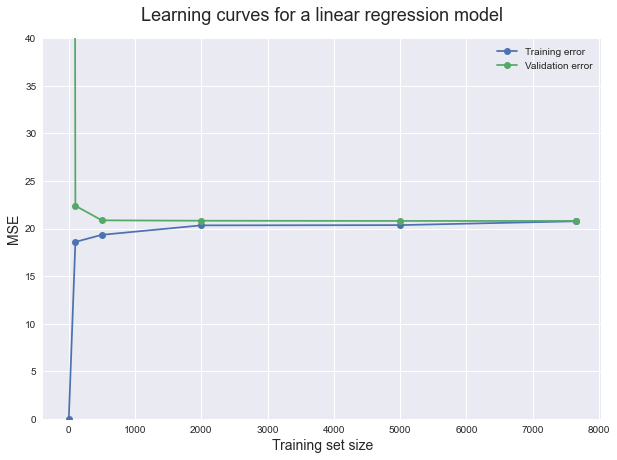

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, marker='o', label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, marker='o', label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0, 40)
plt.savefig('images/learning-curve-01.png', format='png')
plt.show()

**NOTE:**  
Há muitas informações que podemos extrair do gráfico acima. Por exemplo:

 - **Quando o tamanho do conjunto de treinamento é 1, podemos ver que o *MSE* para o conjunto de treinamento é 0 (zero):**
   - Este é um comportamento normal, pois o modelo não tem problemas para ajustar perfeitamente um único ponto de dados. Portanto, quando testado no mesmo ponto de dados, a previsão é perfeita.
 - **Mas quando testado no conjunto de validação (que tem 1914 instâncias), o *MSE* dispara até aproximadamente 423,4:**
   - Esse valor relativamente alto é a razão pela qual restringimos o intervalo do eixo y entre 0 e 40. Isso nos permite ler a maioria dos valores de MSE com precisão.
   - Um valor tão alto é esperado, pois é extremamente improvável que um modelo treinado em um único ponto de dados possa generalizar com precisão para 1.914 novas instâncias que não foram vistas no treinamento.
 - **Quando o tamanho do conjunto de treinamento aumenta para 100, o *MSE* de treinamento aumenta acentuadamente:**
   - O modelo de regressão linear não prevê todos os 100 pontos de treinamento perfeitamente, então o MSE de treinamento é maior que 0.
   - No entanto, o modelo tem um desempenho muito melhor agora no conjunto de validação porque é estimado com mais dados.

**Agora vem a observação mais importante de todas:**  
A partir de 500 pontos (instâncias) de dados de treinamento, o *MSE* de validação permanece praticamente o mesmo. Isso nos diz algo extremamente importante:

 - **Adicionar mais pontos (instâncias) de dados de treinamento não levará a modelos significativamente melhores. Então, em vez de perder tempo (e possivelmente dinheiro) coletando mais dados, precisamos tentar outra abordagem, como:**
   - Mudar para um algoritmo que possa construir modelos mais complexos;
   - Preprocessar os recursos (features) existentes;
   - Ou adicionar novos recursos (features).

Vamos comparar a nosssa análise com a imagem (gráfico) abaixo:

![img](images/add_data.webp)  

 - **No primeiro gráfico (imagem) nós temos a seguinte situação:**
   - As duas curvas já convergiram;
   - Adicionar mais instâncias de treinamento provavelmente não ajudará diminuir o erro do conjunto de validação;
   - Provavelmente será melhor preprocessar ou adicionar novos recursos (features) do que adicionar novas instâncias.
 - **No segundo gráfico (imagem) nós temos a seguinte situação:**
   - A curva de validação pode convergir para a curva de treinamento se mais instâncias de treinamento forem adicionadas

**NOTE:**  
Viram que tanto no nosso gráfico como nesse último exemplo (imagem) nós estamos trabalhando no **trade-off viés-variância** até chegar nos valores mínimos possíveis simultaneamente (provavelmente quando as curvas convergem).

---

## 03.5 - Analisando o erro do conjunto de validação (viés/bias)

Para evitar um equívoco aqui, é importante notar que o que realmente não vai ajudar a diminuir o erro no conjunto de validação é adicionar mais instâncias (linhas) aos dados de treinamento. Então, qual seria uma solução para diminuir os erros no conjunto de validação?

> **Adicionar mais recursos (features), no entanto, é uma abordagem diferente e provavelmente ajudará porque aumentará a complexidade do nosso modelo atual. E como nós sabemos quando a complexidade de um modelo aumenta a variância também aumenta e o viés/bias diminui. Ou seja, estamos diminuindo os erros do conjunto de validação.**

**NOTE:**  
Como nós sabemos o principal indicador de um problema de **viés/bias** é um *alto erro de validação*. No nosso caso, o **MSE** de validação estagna em um valor de aproximadamente **20**.

> Mas isso é bom ou ruim?

**NOTE:**  
Nós nos beneficiaríamos de algum conhecimento do domínio (talvez física ou engenharia neste caso) do problema para responder essa pergunta. Mas imagine que nós pagamos uma consultoria técnica que nós deu a seguinte conclusão:


> Que um *MSE* de *20 MW* é bem grande para esse tipo de problema. Portanto, nosso modelo tem um problema de viés.

Mas é um **problema de baixo viés** ou um **problema de alto viés**? Para encontrar a resposta, precisamos olhar para o erro de treinamento:**

 - **Se o erro de treinamento for muito baixo, significa que os dados de treinamento estão muito bem ajustados pelo modelo estimado:**
   - Se o modelo se ajustar muito bem aos dados de treinamento, significa que ele tem baixo viés em relação a esse conjunto de dados.
 - **Se o erro de treinamento for alto, significa que os dados de treinamento não estão bem ajustados pelo modelo estimado:**
   - Se o modelo não se ajustar bem aos dados de treinamento, isso significa que ele possui um alto viés em relação a esse conjunto de dados.

Para ficar mais claro, vamos analisar a imagem abaixo:

![img](images/low_high_bias.png)  

 - **No caso de alto viés/bias (High Bias):**
   - Quando nós temos um alto erro no conjunto de treinamento indica que teremos um alto erro viés/bias;
   - Esse erro de viés/bias está relacionado com o erro de validação (teste).
 - **No caso de baixo viés/bias (Low Bias):**
   - Quando nós temos um baixo erro no conjunto de treinamento indica que teremos um baixo erro de viés/bias;
   - Esse baixo erro de viés/bias também está relacionado com o erro de validação.

**NOTE:**  
Resumindo, agora nós sabemos que o nosso modelo tem um problema **alto viés/bias**.

> Mas, como resolver esse problema de **Alto viés/bias**?

---

## 03.6 - Analisando o erro do conjunto de treinamento (variação/variância)

Bem, como nós diagnosticamos no tópico anterior temos um **problema de alto viés/bias** no nosso modelo. Agora vamos tentar um **trade-off** de **viés-variância** para ver se conseguimos resolver ou minimizar esse problema.

> Similar ao conjunto de validação, nosso conjunto de treinamento também tem um **MSE** de aproximadamente **20 MW**. Como já estabelecemos, essa é uma pontuação de (score) **erro alta**.

Agora vamos avançar com o diagnóstico de eventuais problemas de **variação**. A estimativa da **variância** pode ser feita de pelo menos duas maneiras:

 - **Examinando a lacuna (gap) entre a curva de aprendizado de treinamento e a curva de aprendizado de validação.**
 - **Examinando o erro de treinamento:**
   - Seu valor e sua evolução à medida que o tamanho do conjunto de treinamento aumenta.

Vamos começar analisando a lacuna (gap) entre a curva de aprendizado de treinamento e a curva de aprendizado de validação para o nosso problema:

![img](images/lc_regression.webp)  

**Vejam que nós temos uma lacuna (gap) estreita:**
 - Geralmente, quanto mais estreita a lacuna (gap), menor a variância;
 - O oposto também é verdadeiro: quanto maior a diferença da lacuna (gap), maior a variância.

**Vamos agora explicar por que esse é o caso:**  

 - **Como discutimos anteriormente:**
   - **Se a variação for alta, o modelo se ajusta muito bem aos dados de treinamento:**
     - Quando os dados de treinamento são ajustados muito bem, o modelo terá problemas para generalizar em dados que não foram vistos no treinamento.
     - Quando tal modelo é testado em seu conjunto de treinamento e, em seguida, em um conjunto de validação, o erro de treinamento será baixo e o erro de validação geralmente será alto.

A relação entre o erro de treinamento e validação e a lacuna pode ser resumida desta forma:

![img](images/gap-01.png)  

**NOTE:**  
Quanto maior a diferença entre os dois erros, maior a variação. No nosso caso, a diferença é muito estreita, então podemos concluir com segurança que a **variância é baixa**.

Vamos analisar os gráficos (imagens) abaixo agora:

![img](images/low_high_var.webp)  

**Analisando os gráficos acima nós temos que:**  
 - **Quanto MAIOR o erro nos dados de treinamento:**
   - Menor a lacuna (gap):
     - Menor a variância (ou baixa variância).
 - **Quanto MENOR o erro nos dados de treinamento:**
   - Maior a lacuna (gap):
     - Maior a variância (ou alta variância).

**NOTE:**  
No nosso caso, o **MSE** de treinamento se estabiliza em torno de **20 MW**, e já concluímos que é um valor alto. Então, além de uma lacuna (gap) estreita, agora temos outra confirmação de que temos um problema de **baixa variância**.

---

## 03.7 - Resumo das Análises das Learning Curves (ou Curvas de Aprendizado)

Até agora nós já fizemos várias análises e podemos concluir que:

 - **Nosso algoritmo (modelo):**
   - Tem problema alto viés/bias;
   - Tem problema baixa variância;
   - Adicionar mais instâncias (linhas) aos dados de treinamento é altamente improvável que leve a melhores modelos no algoritmo (modelo) de aprendizado atual.

**NOTE:**  
Uma solução (não definitiva, podemos ter outras) neste momento é mudar para um algoritmo de aprendizado mais complexo. Isso deve:

 - **Aumenta a variância:**
   - Visto que quando a complexidade de um modelo aumenta a variância também aumenta e como temos um problema de baixa variãncia, essa abordagem ajudaria resolver ou diminuir esse problema.
 - **Diminuir o viés/bias:**
   - Nós também sabemos que quando a complexidade de um modelo aumenta o viés/bias diminui e isso também nós ajudaria no nosso problema de alta viés/bias.

---

## 03.8 - Aumentando a Complexidade do modelo

Como já ficou bem claro no resumo das análises acima mudar para um algoritmo de aprendizado mais complexo pode ser uma das soluções. Vamos ver como o Algoritmo **RandomForestRegressor** não regularizado se sai aqui.

**NOTE:**  
Geraremos as curvas de aprendizado usando o mesmo fluxo de trabalho de antes. Porém, desta vez, agruparemos tudo em uma função para que possamos usá-la mais tarde. Para comparação, também exibiremos as curvas de aprendizado para o modelo de regressão linear feitas anteriormente.

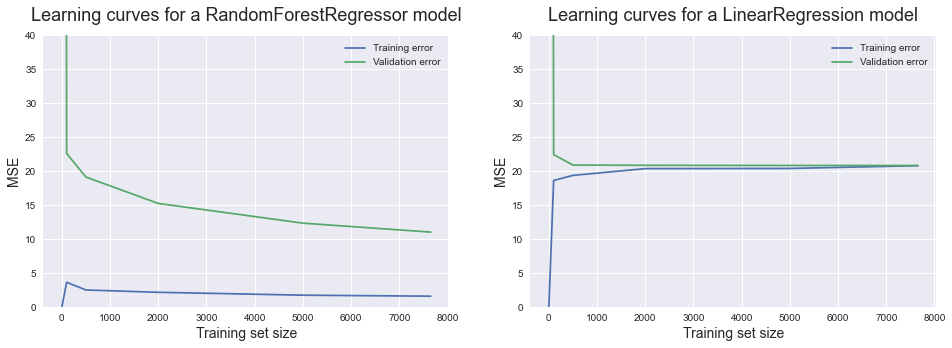

In [11]:
def create_learning_curves(estimator, data, features, target, train_sizes, cv):
  train_sizes, train_scores, validation_scores = learning_curve(
  estimator, data[features], data[target], train_sizes =
  train_sizes,
  cv = cv, scoring = 'neg_mean_squared_error')
  train_scores_mean = -train_scores.mean(axis = 1)
  validation_scores_mean = -validation_scores.mean(axis = 1)

  plt.plot(train_sizes, train_scores_mean, label = 'Training error')
  plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

  plt.ylabel('MSE', fontsize = 14)
  plt.xlabel('Training set size', fontsize = 14)
  title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
  plt.title(title, fontsize = 18, y = 1.03)
  plt.legend()
  plt.ylim(0,40)

### Plotting the two learning curves ###

from sklearn.ensemble import RandomForestRegressor

plt.figure(figsize = (16,5))

for model, i in [(RandomForestRegressor(), 1), (LinearRegression(),2)]:
  plt.subplot(1, 2, i)
  create_learning_curves(model, electricity, features, target, train_sizes, 5)

**Vamos agora comparar, analisar e interpretar os 2 gráficos acima:**  
 - Observando a curva de validação do novo modelo (algoritmo), podemos ver que conseguimos diminuir o viés/bias:
   - Ainda há algum viés/bias significativo, mas não tanto quanto antes.
 - Observando a curva de treinamento, podemos *deduzir* que desta vez há um problema de baixo viés;
 - A nova lacuna (gap) entre as duas curvas de aprendizado sugere um aumento substancial na variância;
 - A grande lacuna (gap) e o baixo erro de treinamento também indicam um problema de *overfitting:*
   - O *Overfitting* acontece quando o modelo tem um bom desempenho no conjunto de treinamento, mas muito pior no conjunto de teste (ou validação).
 - Mais uma observação importante é que agora podemos adição de novas instâncias de treinamento e provavelmente levará a modelos melhores;
 - A curva de validação não se estabiliza no tamanho máximo do conjunto de treinamento usado. Ele ainda tem potencial para diminuir e convergir para a curva de treinamento, semelhante à convergência que vemos no caso da regressão linear.


**Diante de todas essas observações, podemos concluir que:**
 - Nosso novo algoritmo de aprendizado (RandomForestRegressor) sofre de:
   - Alta variância;
   - E um viés bastante baixo, superajustando os dados de treinamento.
 - A adição de mais instâncias de treinamento provavelmente levará a modelos melhores no algoritmo de aprendizado atual (RandomForestRegressor).

**Neste ponto, aqui estão algumas coisas que podemos fazer para melhorar nosso modelo:**
 - Adicionando mais instâncias de treinamento;
 - Aumentar a regularização do nosso algoritmo de aprendizado atual. Isso deve diminuir a variância e aumentar o viés;
 - Reduzindo o número de recursos nos dados de treinamento que usamos atualmente. O algoritmo ainda se ajustará muito bem aos dados de treinamento, mas devido ao número reduzido de recursos, ele construirá modelos menos complexos. Isso deve aumentar o viés e diminuir a variância.

**NOTE:**  
No nosso caso, não temos outros dados prontamente disponíveis. Poderíamos entrar na usina e fazer algumas medições, mas vamos guardar ignorar essa possibilidade.

**Regularizando o nosso modelo (Algoritmo):**  
Vamos tentar regularizar nosso algoritmo **RandomForestRegressor**. Uma maneira de fazer isso é ajustar o número máximo de nós folha em cada árvore de decisão. Isso pode ser feito usando o parâmetro **max_leaf_nodes**. Não é necessariamente para você entender essa técnica de regularização. Para nosso propósito aqui, o que você precisa focar é o efeito dessa regularização nas curvas de aprendizado.

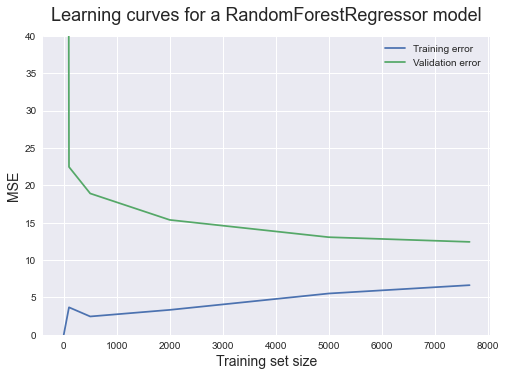

In [12]:
create_learning_curves(RandomForestRegressor(max_leaf_nodes = 350), electricity, features, target, train_sizes, 5)

**Nada mal!**  
A diferença agora é mais estreita, então há menos variação. O viés/bias parece ter aumentado um pouco, que é o que queríamos. Mas nosso trabalho está longe de terminar! O **MSE** de validação ainda mostra muito potencial para diminuir.

**Algumas etapas que você pode tomar em direção a esse objetivo incluem:**  
 - Adicionando mais instâncias de treinamento;
 - Adicionando mais recursos;
 - Seleção de recursos;
 - Otimização de hiperparâmetros.

---

## 03.9 - As Curvas de Aprendizado ideais & o Erro Irredutível

As curvas de aprendizado constituem uma ótima ferramenta para fazer uma verificação rápida em nossos modelos em todos os pontos do fluxo de trabalho de aprendizado de máquina.

 - Mas como sabemos quando parar?
 - Como reconhecemos as curvas de aprendizado perfeitas?

**NOTE:**  
Para nosso caso de regressão anterior, você pode pensar que o cenário perfeito é quando ambas as curvas convergem para um **MSE** de 0. Esse é um cenário perfeito, de fato, mas, infelizmente, não é possível. Nem na prática, nem na teoria.

> E isso é por causa de algo chamado **Erro Irredutível**.

Quando construímos um modelo para mapear a relação entre os recursos ***X*** e o alvo ***Y***, assumimos que existe tal relação em primeiro lugar. Desde que a suposição seja verdadeira, existe um modelo ***f(X)*** verdadeiro que descreve perfeitamente a relação entre ***X*** e ***Y***, igual a:

![img](images/irreducicle-error-01.png)  


**Mas e esse erro (irreducible error) que foi adicionado a equação?**  
Não acabamos de dizer que ***f(X)*** descreve perfeitamente a relação entre ***X*** e ***Y***? Há um erro aí porque ***Y*** não é apenas uma função do nosso número limitado de recursos ***X***.

**Pode haver muitas outras características que influenciam o valor de *Y*:**
 - Recursos que não temos;
 - Pode ser também o caso de ***X*** ter erros de medição.

**NOTE:**  
Ou seja, mesmo que mínimo nós **SEMPRE** teremos um erro e esse erro é chamado de **Erro Irredutível**.

**Agora vamos explicar porque esse *erro* é *irredutível (irreducible)*:**  
Quando nós estimarmos ***f(X)*** com um modelo ***f<sup>^</sup>(X)***, **introduzimos outro tipo de erro**, chamado erro **redutível**:

![img](images/irreducicle-error-02.png)  

**NOTE:**  
Vejam que agora nós temos outro tipo de erro, **reducicle Error**.

Substituindo ***f(X)*** por ***f<sup>^</sup>(X)*** agora nós teremos:

![img](images/irreducicle-error-03.png)  

**NOTE:**  
Observem que no total nós agora temos 2 erros somados ao resultado do nosso modelo:
 - **Reducicle Error**;
 - **Irreducible Error**.

**NOTE:**  
O erro que é **redutível (Reducicle Error)** pode ser reduzido construindo modelos melhores. Ou seja, ele pode ser minimizado ou reduzido totalmente. No entanto, o erro **Erro Irredutível (Irreducible Error)** não pode ser removido da equação. Ele SEMPRE vai existir, pouco ou muito, mas vai.

**NOTE:**  
Daqui deduzimos que não importa quão boa seja nossa estimativa de modelo, geralmente ainda há algum erro que não podemos reduzir. E é por isso que esse erro é considerado **irredutível**.

**NOTE:**  
Isso nos diz que na prática as melhores curvas de aprendizado possíveis que podemos ver são aquelas que convergem para o valor de algum **erro irredutível**, não para algum valor de erro ideal *(para **MSE**, a pontuação de erro ideal é **0**; veremos imediatamente que outras métricas de erro têm valores de erro ideais diferentes)*.

Vamos agora analisar o gráfico (imagem) abaixo:

![img](images/irr_error.webp)  

**NOTE:**  
Na prática, o valor exato do **Erro Irredutível** é quase sempre *desconhecido*. Também assumimos que o **Erro Irredutível** é independente de ***X***. Isso significa que não podemos usar ***X*** para encontrar o verdadeiro **Erro Irredutível**.

---

## 03.10 - E quanto a problemas de Classificação?

Até agora, aprendemos sobre curvas de aprendizado em uma configuração de regressão. Para tarefas de classificação, o fluxo de trabalho é quase idêntico. A principal diferença é que teremos que escolher outra métrica de erro – uma que seja adequada para avaliar o desempenho de um classificador.

Vejamos um exemplo:

![img](images/classification_last.webp)  

**NOTE:**  
Ao contrário do que vimos até agora, observe que a curva de aprendizado do erro de treinamento está acima da curva do erro de validação.

> Isso ocorre porque a Métricas de Avaliação usada, *accuracy*, descreve o quão bom é o modelo. Ou seja, quanto maior melhor.

**NOTE:**  
O **MSE**, por outro lado, descreve o quão ruim é um modelo. Quanto menor o **MSE**, melhor.

---

# O objetivo principal dos nossos estudos é responder as perguntas abaixo:

 - **Como diagnostica *alto* ou *baixo* *viés/bias* e *variância*?**
   - **Viés/Bias Análise:**
     - **Alto viés/bias:**
       - O principal indicador de um problema de **viés/bias** é um alto erro de validação.
       - Quando nós temos um alto erro no conjunto de treinamento indica que teremos um alto erro viés/bias;
     - **Baixo viés/bias:**
       - Quando nós temos um baixo erro no conjunto de treinamento indica que teremos um baixo erro de viés/bias;
       - Esse baixo erro de viés/bias também está relacionado com o erro de validação.
   - **Variância Análise**
     - **Alto Variância:**
       - Quanto maior a diferença da lacuna (gap), maior a variância.
     - **Baixo Variância:**
       - Geralmente, quanto mais estreita a lacuna (gap), menor a variância;
 - **E que ações devemos tomar uma vez que detectamos algo?**
    - **Viés/Bias Análise:**
     - **Alto viés/bias:**
       - x
     - **Baixo viés/bias:**
       - x
    - **Variância Análise**
     - **Alto Variância:**
       - x
     - **Baixo Variância:**
       - x

---

# Resumos Gerais:

 - ***Aprendizado Supervisionado:***
   - No *aprendizado supervisionado*, assumimos que há uma relação real entre os **recursos (features)** e o **destino (variável target)**
 - ***f* vs. *f<sup>^</sup>*:**
   - ***f***:
     - É um modelo que que descreve perfeitamente a relação entre **recursos (features)** e o **destino (variável target)**;
     - Na prática ***f***,é quase sempre completamente desconhecido.
   - ***f<sup>^</sup>***:
     - O ***f<sup>^</sup>*** é o resultado da estimação (ou previsão) do modelo ***f***.
 - **Viés (bias) vs. Variância:**
   - **Viés (bias)**:
     - x
   - **Variância:**
     - À medida que mudamos os *conjuntos de treinamento*, obtemos saídas diferentes para ***f<sup>^</sup>***. O **montante** pelo qual **varia** conforme mudamos os conjuntos de treinamento é chamado de **variância**.
     - A grande lacuna (gap) e o baixo erro de treinamento também indicam um problema de *overfitting:*
       - O overfitting acontece quando o modelo tem um bom desempenho no conjunto de treinamento, mas muito pior no conjunto de teste (ou validação).

**REFERÊNCIAS:**  
[Tutorial: Learning Curves for Machine Learning in Python](https://www.dataquest.io/blog/learning-curves-machine-learning/)  
[O que é bias-variance tradeoff](https://medium.com/data-hackers/o-que-%C3%A9-bias-variance-tradeoff-a5bc19866e4b)